In [1]:
a = [1,2,3,4]


In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from EMAN2 import *

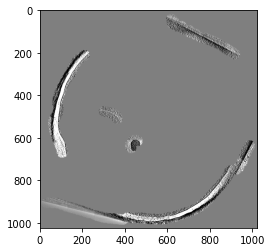

In [2]:
img = to_numpy(EMData('slice_128_edge.hdf',0))
plt.imshow(img,cmap='gray') 

In [7]:
#define the vertical filter
vertical_filter = [[-1,-2,-1], [0,0,0], [1,2,1]]

#define the horizontal filter
horizontal_filter = [[-1,0,1], [-2,0,2], [-1,0,1]]

#read in the pinwheel image
#img = plt.imread('pinwheel.jpg')
img = img.reshape(1024,1024,1)
#get the dimensions of the image
n,m,d = img.shape

#initialize the edges image
edges_img = img.copy()

#loop over all pixels in the image
for row in range(3, n-2):
    for col in range(3, m-2):
        
        #create little local 3x3 box
        local_pixels = img[row-1:row+2, col-1:col+2, 0]
        
        #apply the vertical filter
        vertical_transformed_pixels = vertical_filter*local_pixels
        #remap the vertical score
        vertical_score = vertical_transformed_pixels.sum()/4
        
        #apply the horizontal filter
        horizontal_transformed_pixels = horizontal_filter*local_pixels
        #remap the horizontal score
        horizontal_score = horizontal_transformed_pixels.sum()/4
        
        #combine the horizontal and vertical scores into a total edge score
        edge_score = (vertical_score**2 + horizontal_score**2)**.5
        
        #insert this edge score into the edges image
        edges_img[row, col] = [edge_score]

#remap the values in the 0-1 range in case they went out of bounds
edges_img = edges_img/edges_img.max()

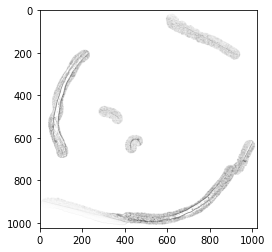

In [10]:
plt.imshow(edges_img*-1,cmap='gray')

In [18]:
#np.histogram(edges_img.flatten(),bins=10)
#plt.imshow(edges_img>0.5)
a = from_numpy((edges_img>0.5).squeeze())
a.write_image("edge_detected.hdf")

0.0001

In [24]:
a = edges_img*(edges_img>0.5)

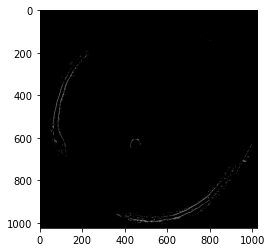

In [33]:
plt.imshow(a,cmap='gray')

In [29]:
img[0][0]

array([0.], dtype=float32)

In [35]:
b = from_numpy(a.squeeze())
b.write_image('edge_detected_2.hdf')

In [37]:
from skimage import morphology
from skimage.morphology.selem import disk

/var/folders/fn/nlgx_qdn2r19y90q6x372b3c0000gn/T/ipykernel_70188/3017856968.py:2: FutureWarning: The `skimage.morphology.selem` module is deprecated and will be removed in scikit-image 1.0 (`skimage.morphology.selem` has been moved to `skimage.morphology.footprints`).
  from skimage.morphology.selem import disk


In [43]:
b = morphology.closing(a.squeeze(),disk(1))

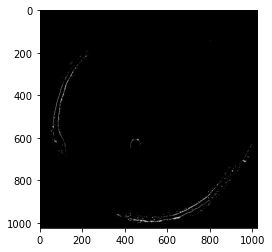

In [44]:
plt.imshow(b,cmap='gray')

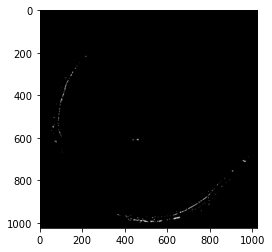

In [45]:
c = morphology.opening(b,disk(1))
plt.imshow(c,cmap='gray')

In [47]:
e = np.where(b>0.4,1,0)
d = from_numpy(e)
d.write_image('closed_edge.hdf')

In [68]:
g = np.ones((128,128))*0.1

In [69]:
for i in range(40,100):
    for j in range(30,80):
        g[i][j] = 1
g

array([[0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       ...,
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1]])

In [76]:
a = test_image(1)
b = to_numpy(a)

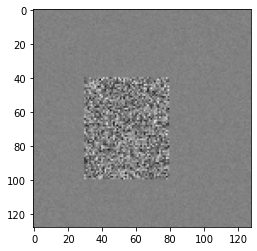

In [73]:
plt.imshow(b,cmap='gray')

In [63]:
b.shape

(128, 128)

In [75]:
plt.imshow(to_numpy(a*g),cmap='gray')

ArgumentError: Python argument types in
    EMNumPy.em2numpy(numpy.ndarray)
did not match C++ signature:
    em2numpy(EMAN::EMData const*)

In [77]:
b = b*g

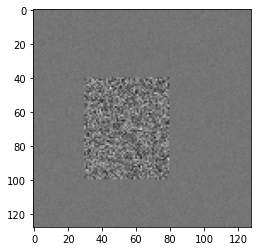

In [79]:
plt.imshow(b,cmap='gray')

In [80]:
b = a.process("mask.fromfile",{"image":from_numpy(g)})

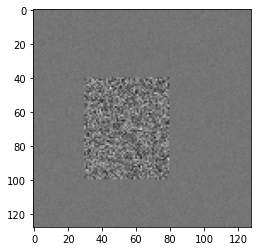

In [84]:
plt.imshow(to_numpy(b),cmap='gray')

In [85]:
124*256

31744

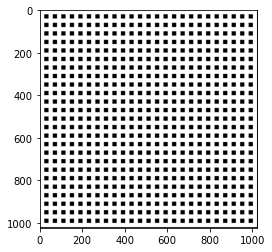

In [104]:
a = np.zeros((1024,1024))
for i in range(0,1020,1):
    for j in range(0,1020,1):
        for k in range(20):
            if i%40 == 0:
                a[i+k][j]=1       
            if j%40 == 0:
                a[i][j+k]=1              
plt.imshow(a, cmap='gray')
    
    

In [106]:
c = from_numpy(a)
c.write_image('test__big_dot.hdf')
